In [1]:
from data_readers.time_series import TimeSeriesDataSet

In [2]:
nad_hr = TimeSeriesDataSet('North Adriatic HR', '/data/CADEAU/COMPACT_STAT_PROFILES')
scenario_rcp45 = TimeSeriesDataSet('Scenario RCP4.5', '/scratch/spiani/TRIX_AGGREGATED/CLIMA100/RCP4.5')
scenario_rcp85 = TimeSeriesDataSet('Scenario RCP8.5', '/scratch/spiani/TRIX_AGGREGATED/CLIMA100/RCP8.5')

In [3]:
from datetime import datetime, timedelta

from basins.cadeau.nad_V0 import nad

def get_time_series(datasets, var_name, basin=nad, depth=0):
    all_time_series = []
    for dataset in datasets:
        time_series = dataset.get_time_series(var_name, basin, depth=depth)

        if dataset.name.startswith('Scenario'):
            time_series = time_series.crop_time(
                datetime(year=2005, month=6, day=1),
                datetime(year=2040, month=1, day=1)
            )

        all_time_series.append(time_series)

    return all_time_series 

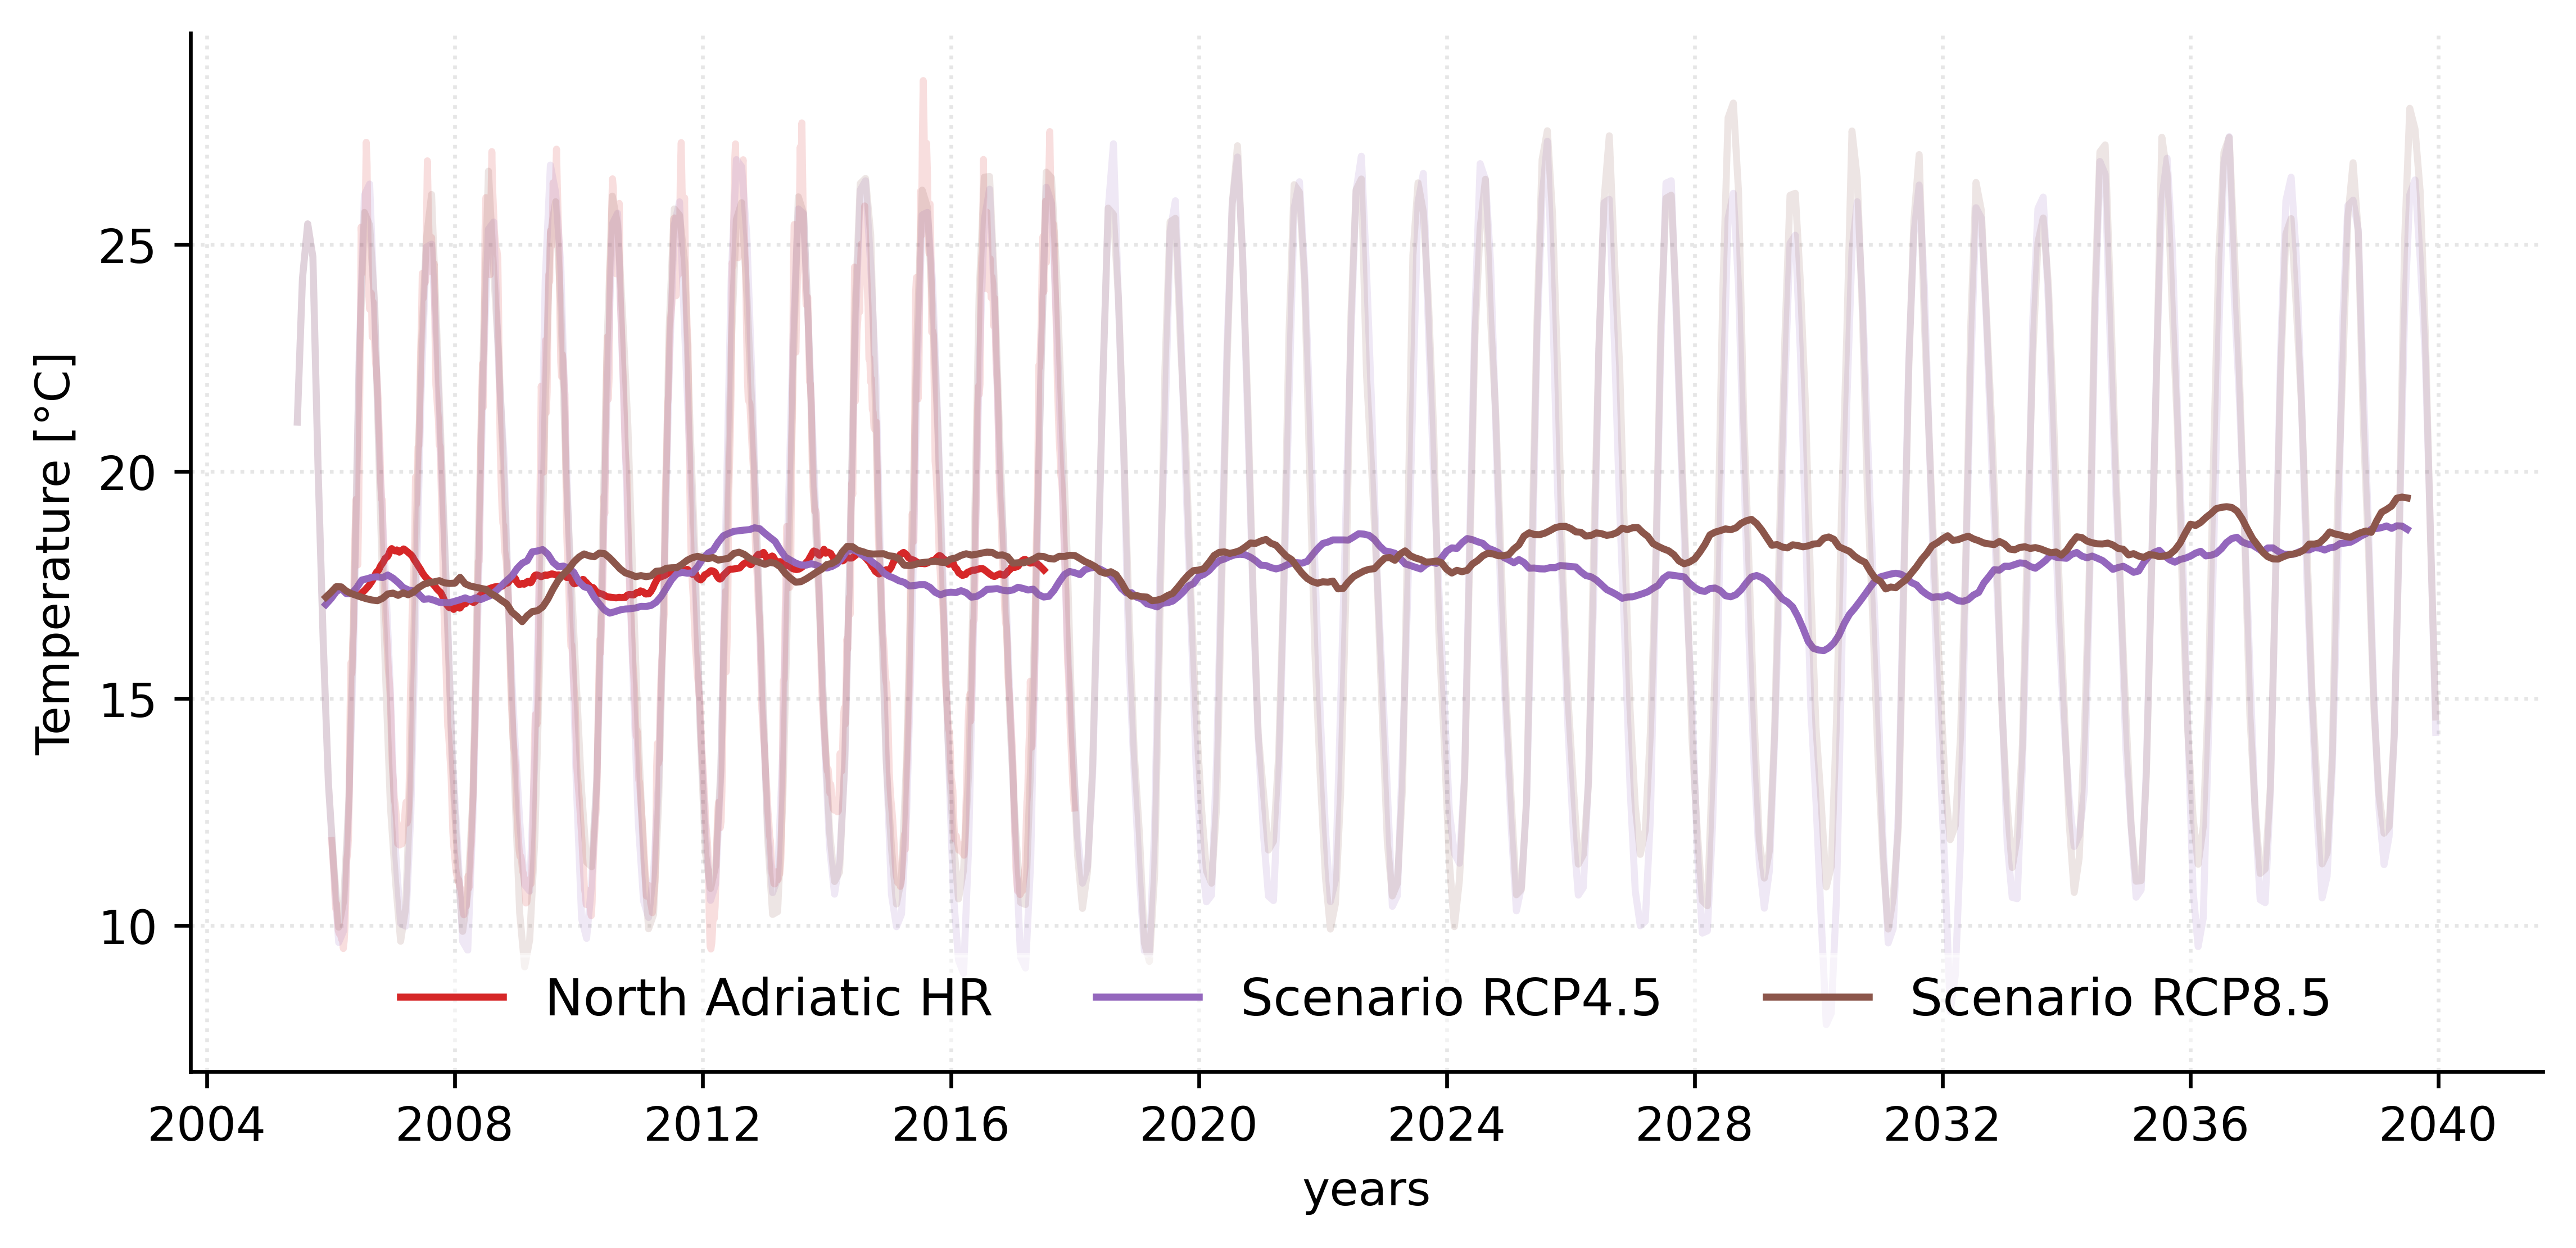

In [4]:
import matplotlib.pyplot as plt

COLORS = {
    'North Adriatic HR': 'C3',
    'Marine Copernicus': 'C0',
    'Scenario RCP4.5': 'C4',
    'Scenario RCP8.5': 'C5'
}

LABELS = {
    'O2o': 'O2o [$\\mathrm{mmol} \\cdot \\mathrm{m}^{-3}$]',
    'TRIX': 'TRIX [-]',
    'T': 'Temperature [°C]',
    'pH': 'pH [-]'
}


def plot_time_series(time_series_list, axis=None):
    if axis is None:
        axis = plt.gca()
    for time_series in time_series_list:
        axis.plot(
            time_series.x,
            time_series.y,
            color=COLORS[time_series.dataset], 
            alpha=0.15
        )

        trend_data = time_series.moving_average(timedelta(days=365))

        axis.plot(
            trend_data.x,
            trend_data.y,
            color=COLORS[time_series.dataset],
            label=time_series.dataset
        )

    axis.set_xlabel('years')

    var_name = time_series_list[0].variable
    if var_name in LABELS:
        axis.set_ylabel(LABELS[var_name])
    else:
        axis.set_ylabel(var_name)

    axis.set_facecolor("white")
    axis.legend(facecolor="white", edgecolor="white", framealpha=0.5, ncols=3, loc='lower center', fontsize=11)
    axis.grid(linestyle=':', rasterized=False, zorder=0, color=(0.9, 0.9, 0.9))
    axis.spines[['right', 'top']].set_visible(False)

plt.figure(dpi=600, figsize=(9, 4))
plot_time_series(
    get_time_series((nad_hr, scenario_rcp45, scenario_rcp85), 'T')
)
plt.show()
plt.close()

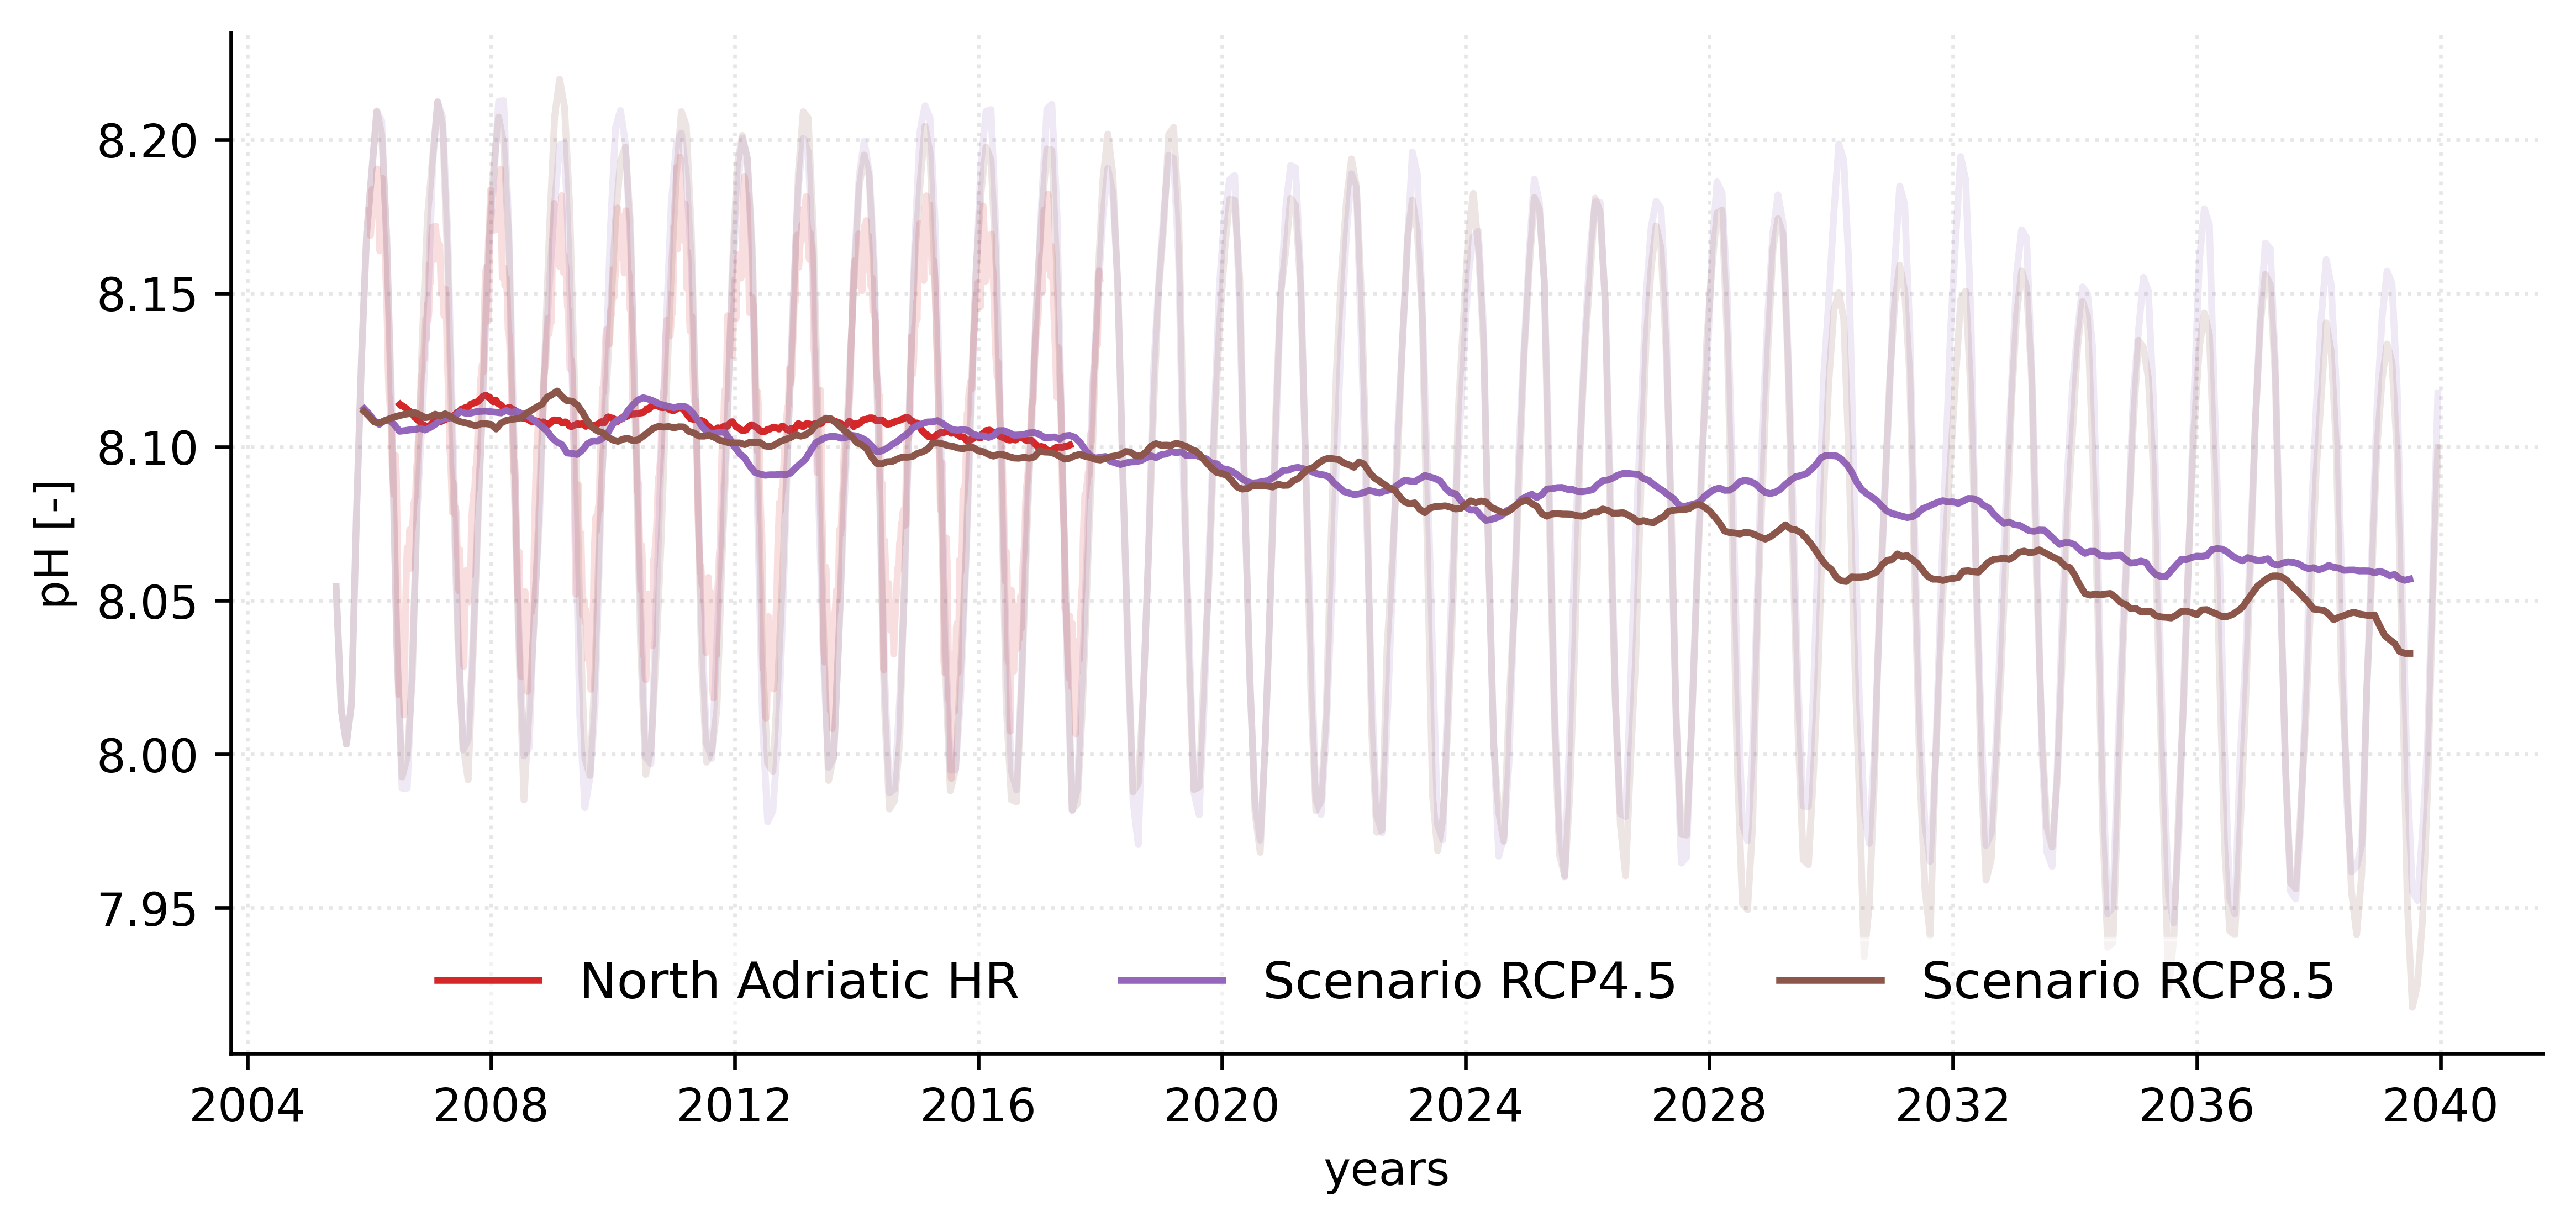

In [5]:
plt.figure(dpi=600, figsize=(9, 4))
plot_time_series(
    get_time_series((nad_hr, scenario_rcp45, scenario_rcp85), 'pH')
)
plt.show()
plt.close()